In [2019]:
# Import Dependenices 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn style
sns.set_style('whitegrid')
# Import More Dependenices 
%matplotlib inline
import matplotlib
from datetime import datetime
# warnings 
import warnings
warnings.filterwarnings("ignore")

# Dependencies and Setup
import pandas as pd
import scipy.stats as st
import json 
import csv

In [2020]:
#Read csv XRP
xrp_csv = pd.read_csv("resources/XRPUSD.csv", parse_dates=['date'])
xrp_csv.head()

,unix,date,symbol,open,high,low,close,Volume XRP,Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06


In [2021]:
# Read CSV bitcoin 
btc_csv = pd.read_csv("resources/BTCUSD.csv", parse_dates=['date'])
btc_csv.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1643846400,2022-02-03,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [2022]:
# ethereum
eth_csv = pd.read_csv("resources/ETHUSD.csv", parse_dates=['date'])
eth_csv.head()

,unix,date,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [2023]:
# dogecoin 
ltc_csv = pd.read_csv("resources/LTCUSD.csv", parse_dates=['date'])
ltc_csv.head()

,unix,date,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [2024]:
# Bringing in stock data to compare volatility vs. crypto.  Rename columns for merging accuracy.

dal_csv = pd.read_csv("resources/DAL.csv", parse_dates=['Date'])
dal_csv = dal_csv.rename(columns={'Date': 'date',
                                  'Close': 'DAL close'})
dal_csv = dal_csv[['date', 'DAL close']]


apl_csv = pd.read_csv("resources/AAPL.csv", parse_dates=['Date'])
apl_csv = apl_csv.rename(columns={'Date': 'date',
                                  'Close': 'APL close'})
apl_csv = apl_csv[['date', 'APL close']]

sbx_csv = pd.read_csv("resources/SBUX.csv", parse_dates=['Date'])
sbx_csv = sbx_csv.rename(columns={'Date': 'date',
                                  'Close': 'SBX close'})
sbx_csv = sbx_csv[['date', 'SBX close']]
                                 

xom_csv = pd.read_csv("resources/XOM.csv", parse_dates=['Date'])
xom_csv = xom_csv.rename(columns={'Date': 'date',
                                  'Close': 'XOM close'})
xom_csv = xom_csv[['date', 'XOM close']]

sp_csv = pd.read_csv("resources/sp500_index.csv", parse_dates=['Date'])
sp_csv = sp_csv.rename(columns={'Date': 'date',
                                  'S&P500': 'S&P close'})





In [2025]:
#Merge XRP & BTC
combined_xrp_btc_df = pd.merge(xrp_csv, btc_csv, on=["unix","date"])
combined_xrp_btc_df.head()

,unix,date,symbol_x,open_x,high_x,low_x,close_x,Volume XRP,Volume USD_x,symbol_y,open_y,high_y,low_y,close_y,Volume BTC,Volume USD_y
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,22.073478,8.148385e+05
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1672.707195,6.176220e+07
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2073.938717,8.032995e+07
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2009.130003,7.733527e+07
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,708.794813,2.689297e+07


In [2026]:
#rename columns 
combined_xrp_btc_df = combined_xrp_btc_df.rename(columns={"symbol_x":"XRP Symbol",
                                                          "open_x":"XRP Open",
                                                          "high_x":"XRP High", 
                                                          "low_x":"XRP Low",
                                                         "close_x": "XRP Close",
                                                         "Volume USD_x":"XRP Volume USD",
                                                         "symbol_y":"BTC Symbol",
                                                          "open_y":"BTC Open",
                                                          "high_y":"BTC High", 
                                                          "low_y":"BTC Low",
                                                         "close_y": "BTC Close",
                                                         "Volume USD_y":"BTC Volume USD"})
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [2027]:
combined_three_df = pd.merge(combined_xrp_btc_df, eth_csv, on=["unix","date"])
combined_three_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,BTC Close,Volume BTC,BTC Volume USD,symbol,open,high,low,close,Volume ETH,Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,36914.82,22.073478,8.148385e+05,ETH/USD,2678.82,2705.17,2667.11,2697.13,159.102953,4.291213e+05
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,36923.50,1672.707195,6.176220e+07,ETH/USD,2792.71,2812.44,2608.78,2682.30,20322.411654,5.451080e+07
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,38733.04,2073.938717,8.032995e+07,ETH/USD,2689.43,2815.00,2676.98,2791.04,29375.252979,8.198751e+07
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,38491.92,2009.130003,7.733527e+07,ETH/USD,2604.38,2708.16,2479.78,2688.91,27255.629475,7.328793e+07
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,37941.82,708.794813,2.689297e+07,ETH/USD,2600.40,2640.26,2543.64,2602.37,8359.759751,2.175519e+07


In [2028]:
#rename columns 
combined_three_df = combined_three_df.rename(columns={"symbol":"ETH Symbol",
                                                          "open":"ETH Open",
                                                          "high":"ETH High", 
                                                          "low":"ETH Low",
                                                         "close": "ETH Close",
                                                         "Volume USD":"ETH Volume USD",
                                                         })
combined_xrp_btc_df


,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,BTC Open,BTC High,BTC Low,BTC Close,Volume BTC,BTC Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,36924.50,37039.89,36803.54,36914.82,2.207348e+01,8.148385e+05
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,38768.08,38883.96,36618.36,36923.50,1.672707e+03,6.176220e+07
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,38483.56,39285.00,38033.78,38733.04,2.073939e+03,8.032995e+07
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,37914.10,38776.33,36631.66,38491.92,2.009130e+03,7.733527e+07
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,38176.45,38378.88,37372.59,37941.82,7.087948e+02,2.689297e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.47,260.00,245.00,255.81,1.275703e+06,5.062100e+03
2532,1425081600,2015-02-28,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,253.06,254.29,245.20,252.98,9.068749e+05,3.613220e+03
2533,1424995200,2015-02-27,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,236.70,256.15,236.16,253.06,5.507720e+06,2.201689e+04
2534,1424908800,2015-02-26,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,237.97,238.55,234.01,236.70,8.266449e+05,3.498780e+03


In [2029]:
#last merge
combined_final_df = pd.merge(combined_three_df, ltc_csv, on=["unix","date"])
combined_final_df.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,symbol,open,high,low,close,Volume LTC,Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06


In [2030]:
#rename columns 
combined_final_df = combined_final_df.rename(columns={"symbol":"LTC Symbol",
                                                          "open":"LTC Open",
                                                          "high":"LTC High", 
                                                          "low":"LTC Low",
                                                         "close": "LTC Close",
                                                         "Volume USD":"LTC Volume USD",
                                                         })
combined_final_df

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,ETH Close,Volume ETH,ETH Volume USD,LTC Symbol,LTC Open,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD
0,1643846400,2022-02-03,XRP/USD,0.60170,0.60245,0.59710,0.59873,2.407082e+05,1.441192e+05,BTC/USD,...,2697.13,159.102953,4.291213e+05,LTC/USD,108.28,108.67,107.80,108.17,474.344500,5.130984e+04
1,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,2682.30,20322.411654,5.451080e+07,LTC/USD,115.20,116.06,107.45,108.37,19452.882481,2.108109e+06
2,1643673600,2022-02-01,XRP/USD,0.61723,0.63101,0.61186,0.62794,2.292164e+07,1.439342e+07,BTC/USD,...,2791.04,29375.252979,8.198751e+07,LTC/USD,109.25,116.84,108.30,115.09,19395.903549,2.232275e+06
3,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,2688.91,27255.629475,7.328793e+07,LTC/USD,108.76,111.18,104.55,109.61,15980.196754,1.751589e+06
4,1643500800,2022-01-30,XRP/USD,0.61603,0.62338,0.59753,0.60226,1.024764e+07,6.171743e+06,BTC/USD,...,2602.37,8359.759751,2.175519e+07,LTC/USD,110.60,112.15,107.43,108.79,11016.064865,1.198438e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2531,1425168000,2015-03-01,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2532,1425081600,2015-02-28,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2533,1424995200,2015-02-27,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00
2534,1424908800,2015-02-26,XRP/USD,0.00000,0.00000,0.00000,0.00000,0.000000e+00,0.000000e+00,BTC/USD,...,0.00,0.000000,0.000000e+00,LTC/USD,0.00,0.00,0.00,0.00,0.000000,0.000000e+00


In [2031]:
# Merging stock data with crypto df for volatility comparision
combined_final_df_dal = pd.merge(combined_final_df, dal_csv, on = ['date'])
combined_final_df_dal_apl = pd.merge(combined_final_df_dal, apl_csv, on = ['date'])
combined_final_df_dal_apl_sbx = pd.merge(combined_final_df_dal_apl, sbx_csv, on = ['date'])
combined_final_df_dal_apl_sbx_sp = pd.merge(combined_final_df_dal_apl_sbx, sp_csv, on = ['date'])
combined_final_df_stocks = pd.merge(combined_final_df_dal_apl_sbx_sp, xom_csv, on = ['date'])

combined_final_df_stocks.head()

,unix,date,XRP Symbol,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Symbol,...,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD,DAL close,APL close,SBX close,S&P close,XOM close
0,1643760000,2022-02-02,XRP/USD,0.62939,0.63161,0.59437,0.60129,1.931602e+07,1.161453e+07,BTC/USD,...,116.06,107.45,108.37,19452.882481,2.108109e+06,40.520000,175.839996,97.730003,4589.38,80.620003
1,1643587200,2022-01-31,XRP/USD,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,BTC/USD,...,111.18,104.55,109.61,15980.196754,1.751589e+06,39.689999,174.779999,98.320000,4515.55,75.959999
2,1643328000,2022-01-28,XRP/USD,0.60773,0.61344,0.59151,0.61111,3.137832e+07,1.917561e+07,BTC/USD,...,110.06,105.48,109.46,15907.172297,1.741199e+06,38.279999,170.330002,97.209999,4431.85,75.279999
3,1643241600,2022-01-27,XRP/USD,0.61718,0.62492,0.58966,0.60815,2.851671e+07,1.734244e+07,BTC/USD,...,110.00,103.14,106.89,19713.027599,2.107126e+06,38.340000,159.220001,95.320000,4326.51,75.120003
4,1643155200,2022-01-26,XRP/USD,0.61805,0.66000,0.60532,0.62001,3.329786e+07,2.064501e+07,BTC/USD,...,116.49,104.85,107.00,21417.976795,2.291724e+06,38.759998,159.690002,95.580002,4349.93,74.169998


In [2032]:
#clean up columns don't need, didn't need symbols for 4 columns
cleaned= combined_final_df_stocks.drop(columns=['unix','XRP Symbol','BTC Symbol','ETH Symbol','LTC Symbol'])
cleaned= cleaned.iloc[: 1000, :]

# Calculate monthly volatility for each crypto
cleaned = cleaned.sort_values('date', ascending=True)

cleaned

,date,XRP Open,XRP High,XRP Low,XRP Close,Volume XRP,XRP Volume USD,BTC Open,BTC High,BTC Low,...,LTC High,LTC Low,LTC Close,Volume LTC,LTC Volume USD,DAL close,APL close,SBX close,S&P close,XOM close
999,2017-08-03,0.17000,0.17680,0.16950,0.17460,9.310617e+05,5.364881e+06,2703.51,2807.44,2698.83,...,43.00,41.69,42.50,3.519408e+05,8.287600e+03,47.669998,34.750000,55.740002,2472.16,81.029999
998,2017-08-08,0.17780,0.19900,0.17700,0.19620,2.968305e+06,1.582897e+07,3387.55,3490.00,3300.00,...,49.70,45.31,48.65,1.654641e+06,3.492035e+04,50.310001,40.020000,54.520000,2474.92,79.959999
997,2017-08-09,0.19620,0.19620,0.17940,0.18350,2.501919e+06,1.345045e+07,3412.41,3423.10,3178.72,...,50.25,46.69,47.68,1.689478e+06,3.485136e+04,47.450001,39.657501,53.490002,2474.02,78.820000
996,2017-08-11,0.18000,0.18340,0.17500,0.17790,1.362356e+06,7.619415e+06,3413.03,3705.00,3390.67,...,47.97,45.64,46.87,1.021046e+06,2.179002e+04,50.060001,44.060001,57.910000,2441.32,83.470001
995,2017-08-14,0.16500,0.18010,0.16380,0.16840,1.856010e+06,1.089803e+07,4053.87,4329.43,3964.96,...,46.20,44.44,45.30,6.339721e+05,1.400810e+04,50.070000,39.962502,53.220001,2465.84,78.230003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-01-26,0.61805,0.66000,0.60532,0.62001,3.329786e+07,2.064501e+07,37006.76,38946.00,36279.21,...,116.49,104.85,107.00,2.141798e+04,2.291724e+06,38.759998,159.690002,95.580002,4349.93,74.169998
3,2022-01-27,0.61718,0.62492,0.58966,0.60815,2.851671e+07,1.734244e+07,36824.02,37251.00,35511.32,...,110.00,103.14,106.89,1.971303e+04,2.107126e+06,38.340000,159.220001,95.320000,4326.51,75.120003
2,2022-01-28,0.60773,0.61344,0.59151,0.61111,3.137832e+07,1.917561e+07,37179.62,38022.11,36173.98,...,110.06,105.48,109.46,1.590717e+04,1.741199e+06,38.279999,170.330002,97.209999,4431.85,75.279999
1,2022-01-31,0.60100,0.62476,0.58036,0.61740,4.273697e+07,2.638580e+07,37914.10,38776.33,36631.66,...,111.18,104.55,109.61,1.598020e+04,1.751589e+06,39.689999,174.779999,98.320000,4515.55,75.959999


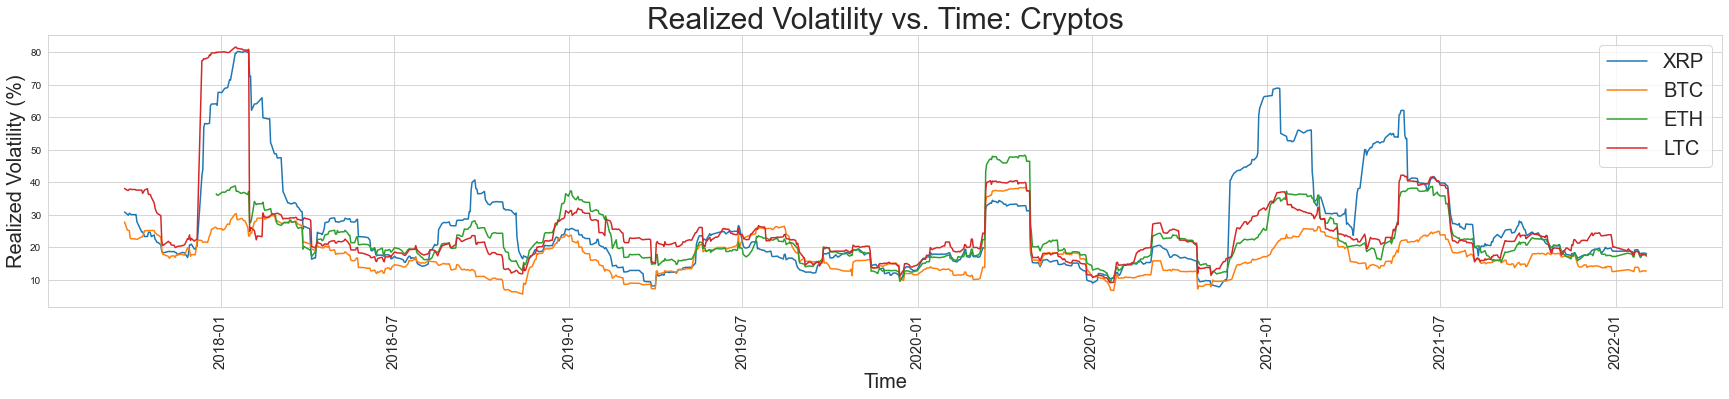

In [2033]:



# Reference: https://stackoverflow.com/questions/43284304/how-to-compute-volatility-standard-deviation-in-rolling-window-in-pandas
# Calculates realized volatility = the realized volatility measures what actually happened in the past

# Creating variables for the annual factor
# Since crypto trades 24/7/365, and I'm calculating a 30-day window, then trading days per year is 365.
crypto_window = 30  # trading days in rolling window for crypto (per month)
crypto_dpy = 365  # trading days per year for crypto
ann_factor_crypto = crypto_dpy / crypto_window

# Takes difference of the log of the prices for each crypto
cleaned['xrp_log_rtn'] = np.log(cleaned['XRP Close']).diff()
cleaned['btc_log_rtn'] = np.log(cleaned['BTC Close']).diff()
cleaned['eth_log_rtn'] = np.log(cleaned['ETH Close']).diff()
cleaned['ltc_log_rtn'] = np.log(cleaned['LTC Close']).diff()



# Calculates the variance of a rolling 30 day window for each crypto
cleaned['xrp_real_var'] = cleaned['xrp_log_rtn'].rolling(crypto_window).var() * ann_factor_crypto
cleaned['btc_real_var'] = cleaned['btc_log_rtn'].rolling(crypto_window).var() * ann_factor_crypto
cleaned['eth_real_var'] = cleaned['eth_log_rtn'].rolling(crypto_window).var() * ann_factor_crypto
cleaned['ltc_real_var'] = cleaned['ltc_log_rtn'].rolling(crypto_window).var() * ann_factor_crypto



# Takes the square root of the realized variance for each crypto
cleaned['xrp_real_vol'] = np.sqrt(cleaned['xrp_real_var']) * 100
cleaned['btc_real_vol'] = np.sqrt(cleaned['btc_real_var']) * 100
cleaned['eth_real_vol'] = np.sqrt(cleaned['eth_real_var']) * 100
cleaned['ltc_real_vol'] = np.sqrt(cleaned['ltc_real_var']) * 100




x_values = cleaned['date']

y_values1 = cleaned["xrp_real_vol"]
y_values2 = cleaned["btc_real_vol"]
y_values3 = cleaned["eth_real_vol"]
y_values4 = cleaned["ltc_real_vol"]


plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.title('Realized Volatility vs. Time: Cryptos', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':20})
plt.show()



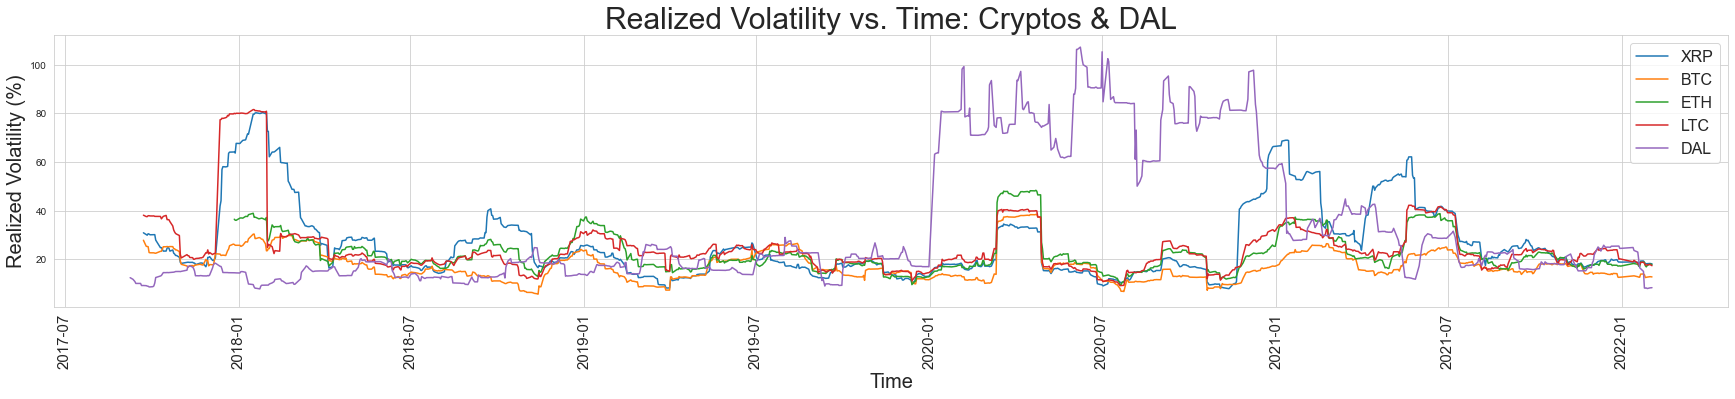

In [2034]:
stock_window = 21 # trading days in rolling window for stocks (per month)
stock_dpy = 252 # trading days per year for stocks

ann_factor_stocks = stock_dpy / stock_window

cleaned['dal_log_rtn'] = np.log(cleaned['DAL close']).diff()

cleaned['dal_real_var'] = cleaned['dal_log_rtn'].rolling(stock_window).var() * ann_factor_stocks

cleaned['dal_real_vol'] = np.sqrt(cleaned['dal_real_var']) * 100

y_values5 = cleaned['dal_real_vol']

plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.plot(x_values, y_values5, label='DAL')
plt.title('Realized Volatility vs. Time: Cryptos & DAL', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':16})
plt.show()


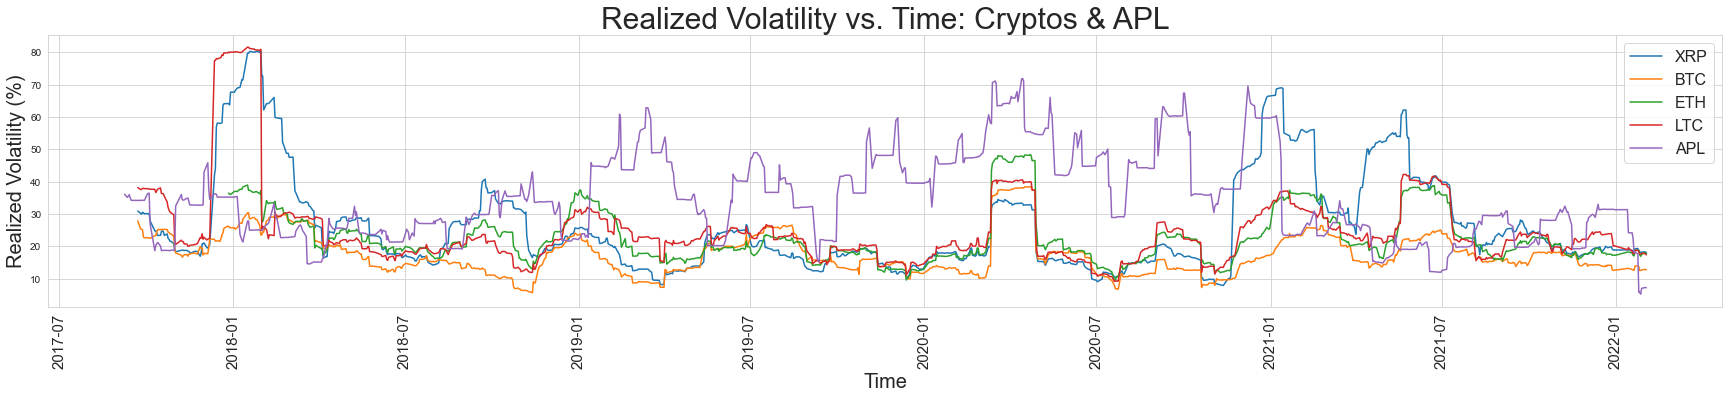

In [2035]:
cleaned['apl_log_rtn'] = np.log(cleaned['APL close']).diff()

cleaned['apl_real_var'] = cleaned['apl_log_rtn'].rolling(stock_window).var() * ann_factor_stocks

cleaned['apl_real_vol'] = np.sqrt(cleaned['apl_real_var']) * 100

y_values5 = cleaned['apl_real_vol']

plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.plot(x_values, y_values5, label='APL')
plt.title('Realized Volatility vs. Time: Cryptos & APL', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':16})
plt.show()

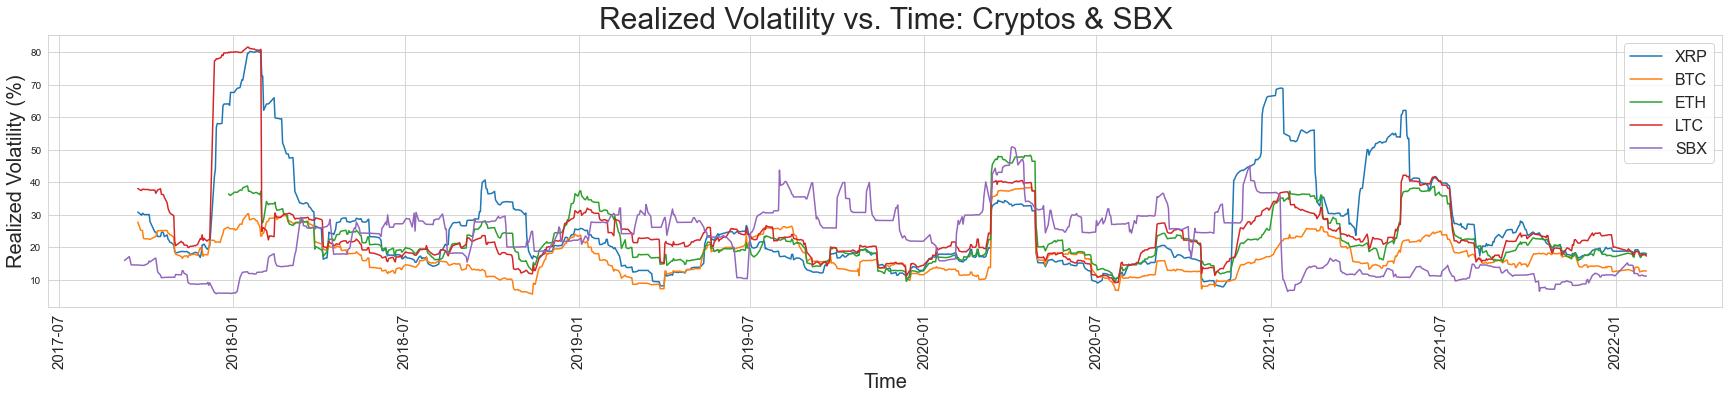

In [2036]:
cleaned['sbx_log_rtn'] = np.log(cleaned['SBX close']).diff()

cleaned['sbx_real_var'] = cleaned['sbx_log_rtn'].rolling(stock_window).var() * ann_factor_stocks

cleaned['sbx_real_vol'] = np.sqrt(cleaned['sbx_real_var']) * 100

y_values5 = cleaned['sbx_real_vol']

plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.plot(x_values, y_values5, label='SBX')
plt.title('Realized Volatility vs. Time: Cryptos & SBX', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':16})
plt.show()

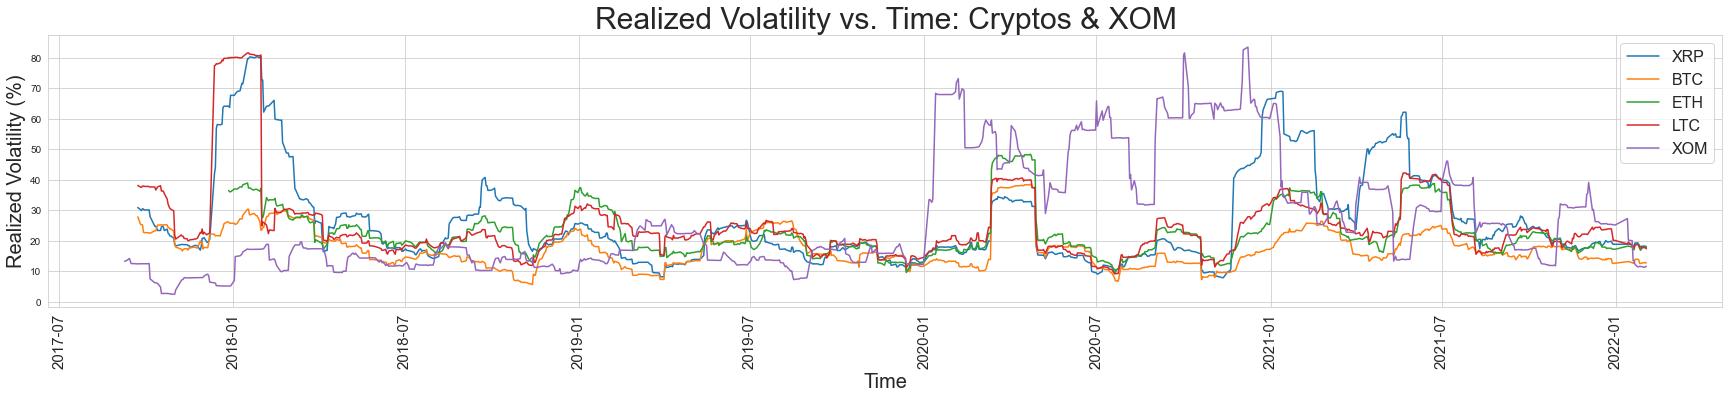

In [2037]:
cleaned['xom_log_rtn'] = np.log(cleaned['XOM close']).diff()

cleaned['xom_real_var'] = cleaned['xom_log_rtn'].rolling(stock_window).var() * ann_factor_stocks

cleaned['xom_real_vol'] = np.sqrt(cleaned['xom_real_var']) * 100

y_values5 = cleaned['xom_real_vol']

plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.plot(x_values, y_values5, label='XOM')
plt.title('Realized Volatility vs. Time: Cryptos & XOM', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':16})
plt.show()

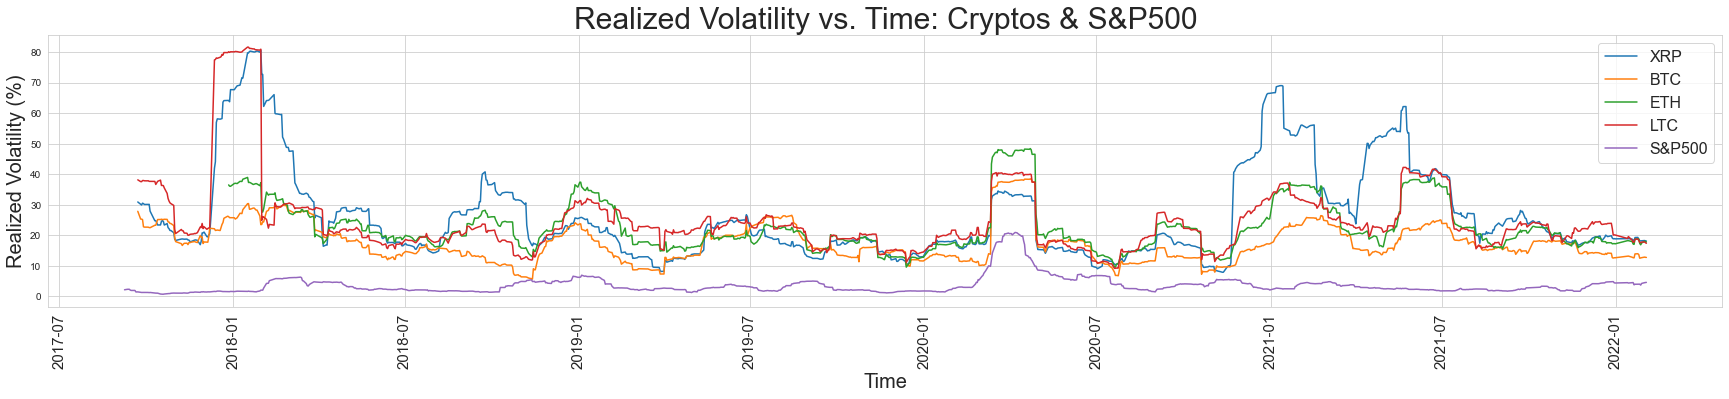

In [2038]:
cleaned['sp_log_rtn'] = np.log(cleaned['S&P close']).diff()

cleaned['sp_real_var'] = cleaned['sp_log_rtn'].rolling(stock_window).var() * ann_factor_stocks

cleaned['sp_real_vol'] = np.sqrt(cleaned['sp_real_var']) * 100

y_values5 = cleaned['sp_real_vol']

plt.figure(figsize=(30,5))
plt.plot(x_values, y_values1, label='XRP')
plt.plot(x_values, y_values2, label='BTC')
plt.plot(x_values, y_values3, label='ETH')
plt.plot(x_values, y_values4, label='LTC')
plt.plot(x_values, y_values5, label='S&P500')
plt.title('Realized Volatility vs. Time: Cryptos & S&P500', fontsize=30)
plt.xlabel('Time', fontsize=20)
plt.ylabel('Realized Volatility (%)', fontsize=20)
plt.xticks(fontsize=15)

plt.xticks(rotation='vertical')
plt.legend(prop={'size':16})
plt.show()